In [1]:
#to get multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np

In [3]:
#한글 이용시, 인코딩에 신경 써야함! UTF-8으로 인코딩 되어있어서, encoding = 'utf-8'써줘야.
cctv_seoul = pd.read_csv('../data/01. CCTV_in_Seoul.csv', encoding = 'utf-8') 
# 이 cctv_seoul을 Data Frame이라 함. excel과 비슷한 구성. 
# utf-8 (excel에서 한글이 깨져 보이는 경우), cp949 (excel에서 한글이 안 깨져 보이는 경우)
# read_csv(경로,sep = ','): CSV파일을 읽는 함수
cctv_seoul.head()   #첫번째 5 row 보여줌. 

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [4]:
# 각 column의 제목을 보고싶을때: .columns
cctv_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [5]:
# 기관명을 자치구로 바꾸기 (renaming columns)  : pandas.dataframe.rename

# cctv_seoul.columns[0] = '자치구'  #list에서 바꾸는것 처럼 바꾸면 오류남. pandas에서 막고 있음. 이때는 다른 코드를 써야함. 

cctv_seoul.rename(columns = {cctv_seoul.columns[0] : '자치구', cctv_seoul.columns[1] : 'cctv수'}, inplace = True) 
#inplace = True : cctv_seoul이라는 변수의 내용을 갱신하라는 소리. 만약 이게 없다면, 변수로 새로 받아서 출력해야함. 
cctv_seoul.head()

# noInplace = cctv_seoul.rename(columns = {cctv_seoul.columns[0] : '자치구', cctv_seoul.columns[1] : 'cctv수'}) 
# #inplace = True : cctv_seoul이라는 변수의 내용을 갱신하라는 소리. 만약 이게 없다면, 변수로 새로 받아서 출력해야함. 
# cctv_seoul.head()
# noInplace.head()

,자치구,cctv수,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [6]:
# excel파일 읽어오기 

population_seoul = pd.read_excel('../data/01. population_in_Seoul.xls', encoding = 'utf-8')
population_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [7]:
#엑셀 파일의 첫 세줄이 column들의 제목으로 되어있기 때문. => 옵션들을 걸어서 읽어오자! 
pop_seoul = pd.read_excel('../data/01. population_in_Seoul.xls', header = 2, usecols = 'B,D,G,J,N', encoding = 'utf-8')  
# header = 2: 3번째 줄 부터 읽어라 
# parse_cols = 'B,D,G,J,N' : B,D,G,J,N  columns만 읽어라.
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [8]:
#column name change

pop_seoul.rename(columns = {pop_seoul.columns[0] : '자치구',
                           pop_seoul.columns[1] : '인구수',
                           pop_seoul.columns[2] : '한국인',
                           pop_seoul.columns[3] : '외국인',
                           pop_seoul.columns[4] : '고령자'}, inplace = True) 
pop_seoul.head()

,자치구,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


# pandas 이용해서 cctv와 인구 현황 데이터 파악하기 

In [9]:
cctv_seoul.head()

,자치구,cctv수,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [10]:
# cctv수로 정렬
cctv_seoul.sort_values(by = 'cctv수').head()

cctv_seoul.sort_values(by = 'cctv수', ascending = False).head()

,자치구,cctv수,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


,자치구,cctv수,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [11]:
# 최근 증가율을 계산해서 column 추가하기 
cctv_seoul['최근증가율'] = (cctv_seoul['2014년'] + cctv_seoul['2015년'] 
                       + cctv_seoul['2016년'])/(cctv_seoul['2013년도 이전'])*100
cctv_seoul.sort_values(by ='최근증가율', ascending = False).head()

,자치구,cctv수,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [12]:
#서울시 인구 현황 정리

pop_seoul.head()

,자치구,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [13]:
# 첫 행의 합계는 우리에게 필요 없음. -- 행을 지우는 명령어 : drop

pop_seoul.drop([0], inplace = True)
pop_seoul.head()

,자치구,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [14]:
# unique조사 

pop_seoul['자치구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [15]:
# NaN 의 위치 찾기  - isnull()

pop_seoul[pop_seoul['자치구'].isnull()]

,자치구,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [16]:
# drop으로 26 삭제 
pop_seoul.drop([26], inplace = True)

pop_seoul

,자치구,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [17]:
# 외국인 비율, 고령자 비율 계산하기 

pop_seoul['외국인 비율'] = pop_seoul['외국인']/pop_seoul['인구수'] *100
pop_seoul['고령자 비율'] = pop_seoul['고령자']/pop_seoul['인구수'] *100

pop_seoul.head()

,자치구,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [18]:
# 인구수로 정렬
pop_seoul.sort_values(by = '인구수', ascending = False).head()

,자치구,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [19]:
# 외국인으로 정렬
pop_seoul.sort_values(by = '외국인', ascending = False).head()

,자치구,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [20]:
# 외국인 비율로 정렬
pop_seoul.sort_values(by = '외국인 비율', ascending = False).head()

,자치구,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [21]:
# 고령자로 정렬
pop_seoul.sort_values(by = '고령자', ascending = False).head()

,자치구,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [22]:
# 고령자 비율로  정렬
pop_seoul.sort_values(by = '고령자 비율', ascending = False).head()

,자치구,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


# CCTV 데이터와 인구 현황 데이터를 합치고 분석하기 

In [23]:
# 두 데이터 셋의 공통된 column인 '자치구'를 기준으로 merge하면 됨. 

cctv_seoul.head()
pop_seoul.head()

data_result = pd.merge(cctv_seoul, pop_seoul, on='자치구')
data_result

,자치구,cctv수,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


,자치구,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


,자치구,cctv수,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
5,광진구,707,573,78,53,174,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,구로구,1561,1142,173,246,323,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
7,금천구,1015,674,51,269,354,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
8,노원구,1265,542,57,451,516,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
9,도봉구,485,238,159,42,386,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [24]:
# 의미 없는 열(column - 세로) 지우기: del
# 의미 없는 행(row - 가로) 지우기: drop

del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,자치구,cctv수,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [25]:
# 나중에 그래프 그릴것을 생각하면, index는 구 이름이 되면 여러모로 유리. : set_index

data_result.set_index('자치구', inplace = True)
data_result.head()

,cctv수,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
자치구,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [26]:
# CCTV데이터와 어떤 변수 (고령자비율, 외국인비율, 인구수)를 비교하는게 가장 좋을까?  ==> 상관계수 분석!
np.corrcoef(data_result['고령자 비율'],data_result['cctv수'])  # 주 대각선을 기준으로 대칭인 행렬이며, 대각선을 빼고 읽으면 됨. 
np.corrcoef(data_result['외국인 비율'],data_result['cctv수']) 
np.corrcoef(data_result['인구수'],data_result['cctv수'])  

#인구수와의 상관계수가 0.3으로 약한 상관관계를 가지고 있다고 볼 수 있음

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [27]:
data_result.sort_values(by='cctv수', ascending=False).head()


data_result.sort_values(by='인구수', ascending=False).head()


,cctv수,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
자치구,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


,cctv수,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
자치구,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## cctv가 많이 설치된 구와 인구수가 많은 구를 시각적으로 비교

In [28]:
#운영 체제에 따른 matplotlib폰트 변경 (mac, window 모두 가능)

import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
    print("You have Mac OS")
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
    print("You have Window")
else: 
    print("Unkwon system..")

You have Mac OS


In [29]:
data_result.head()

,cctv수,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
자치구,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


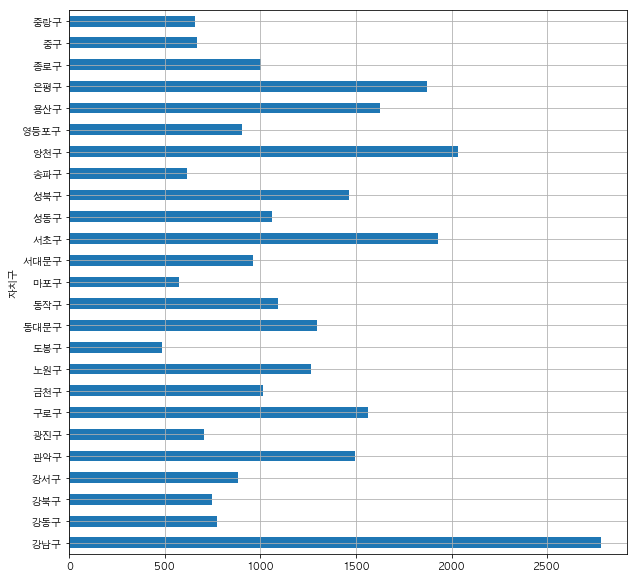

In [30]:
#pandas 데이터 뒤에  plot명령 붙이면 바로 그려줌!!!

data_result['cctv수'].plot(kind = 'barh', grid = True, figsize = (10,10))
plt.show()

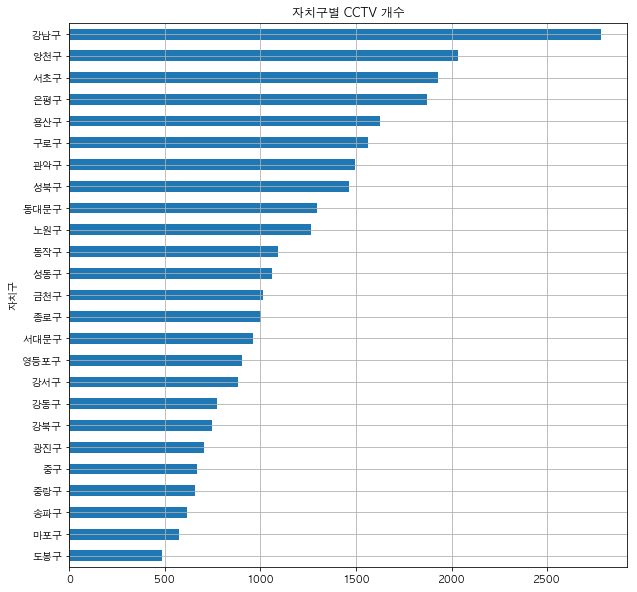

In [31]:
# 정렬해서 다시 보기 
data_result['cctv수'].sort_values().plot(kind = 'barh', grid = True, figsize = (10,10), title = '자치구별 CCTV 개수')
plt.show()

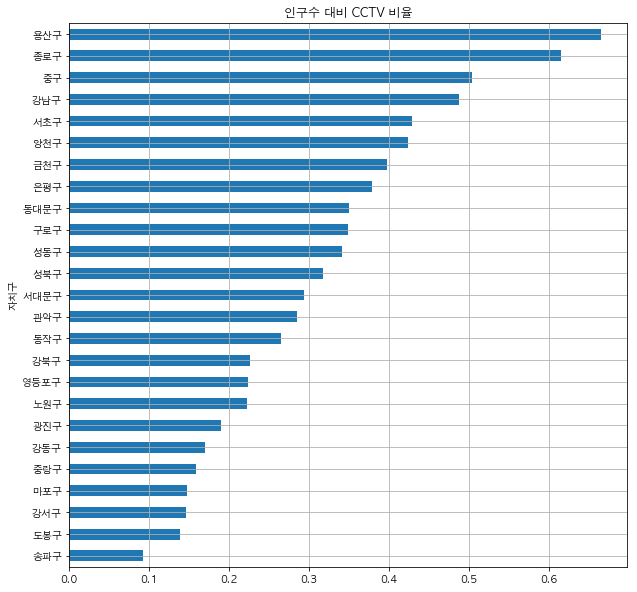

In [32]:
data_result['CCTV비율'] = data_result['cctv수']/data_result['인구수']*100

data_result['CCTV비율'].sort_values().plot(kind = 'barh', grid = True, figsize = (10,10), title = '인구수 대비 CCTV 비율')
plt.show()

<Figure size 432x432 with 0 Axes>

Text(0.5, 0, '인구수')

Text(0, 0.5, 'CCTV')

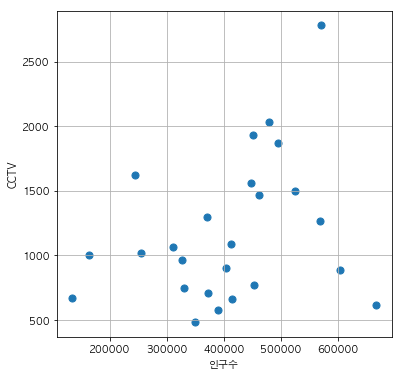

In [33]:
# Scatter 함수 사용
plt.figure(figsize = (6,6))
plt.scatter(data_result['인구수'], data_result['cctv수'], s = 50)  #size = 50
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()


In [34]:
# linear line 그리기

#polyfit: Least squares polynomial fit.
'''
numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)

deg: degree of fitting polynominal

: Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). 
Returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.

return:
p : ndarray, shape (deg + 1,) or (deg + 1, K)
Polynomial coefficients, highest power first. If y was 2-D, the coefficients for k-th data set are in p[:,k].

'''
fp1 = np.polyfit(data_result['인구수'], data_result['cctv수'],1)
fp1
slope = fp1[0]
intercept = fp1[1]
# slope
# intercept

'\nnumpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)\n\ndeg: degree of fitting polynominal\n\n: Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). \nReturns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.\n\nreturn:\np : ndarray, shape (deg + 1,) or (deg + 1, K)\nPolynomial coefficients, highest power first. If y was 2-D, the coefficients for k-th data set are in p[:,k].\n\n'

array([1.30916415e-03, 6.45066497e+02])

In [35]:
# np.poly1d : construct polynominal 
# '''
#  Construct the polynomial x^2 + 2x + 3:

# >>> p = np.poly1d([1, 2, 3])
# >>> print(np.poly1d(p))

#    2
# 1 x + 2 x + 3
# '''

f1 = np.poly1d(fp1)  
print(f1)

fx = np.linspace(100000,700000, 100)  #100000 부터 700000 까지 100 간격으로



 
0.001309 x + 645.1


<Figure size 720x720 with 0 Axes>

Text(0.5, 0, '인구수')

Text(0, 0.5, 'CCTV')

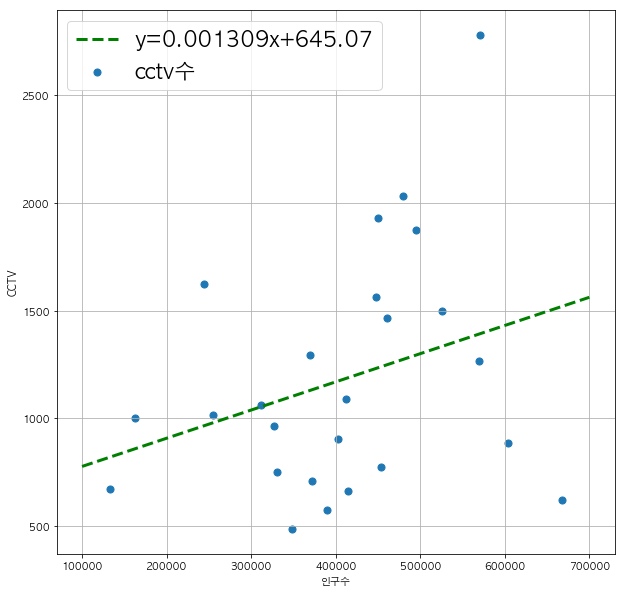

In [36]:
# print(f1(fx)) #fx를 f1 식에 넣어서 얻은 y값. 

plt.figure(figsize = (10,10))
plt.scatter(data_result['인구수'], data_result['cctv수'], s = 50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g', label='y={:.6f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=21)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [37]:
# regression line으로부터 멀리 떨어질수록 다른 색을 나타나게 하고 싶고, 구의 이름도 같이 나타났으면 좋겠음
# ==> 오차를 계산할 수 있는 코드 만들기 

# '''위에꺼 반복 
# fp1 = np.polyfit(data_result['인구수'], data_result['cctv수'],1)

# f1 = np.poly1d(fp1)  
# fx = np.linspace(100000,700000, 100)  #100000 부터 700000 까지 100 간격으로
# '''

#np.abs : absolute value 계산해줌. 
data_result['오차'] = np.abs(data_result['cctv수'] - f1(data_result['인구수'])) #오차 column 만들기

df_sort = data_result.sort_values(by = '오차', ascending = False)
df_sort.head()

,cctv수,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV비율,오차
자치구,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


<Figure size 1008x720 with 0 Axes>

Text(581910.0, 2724.4, '강남구')

Text(680832.66, 605.64, '송파구')

Text(489577.56, 1993.32, '양천구')

Text(459316.2, 1891.3999999999999, '서초구')

Text(249087.06, 1591.52, '용산구')

Text(355618.92, 475.3, '도봉구')

Text(397441.98, 562.52, '마포구')

Text(504275.76, 1835.54, '은평구')

Text(615847.4400000001, 866.3199999999999, '강서구')

Text(422793.06, 646.8, '중랑구')

Text(0.5, 0, '인구수')

Text(0, 0.5, '인구당 CCTV 비율')

Text(0.5, 1.0, '각 구별 인구당 CCTV 비율')

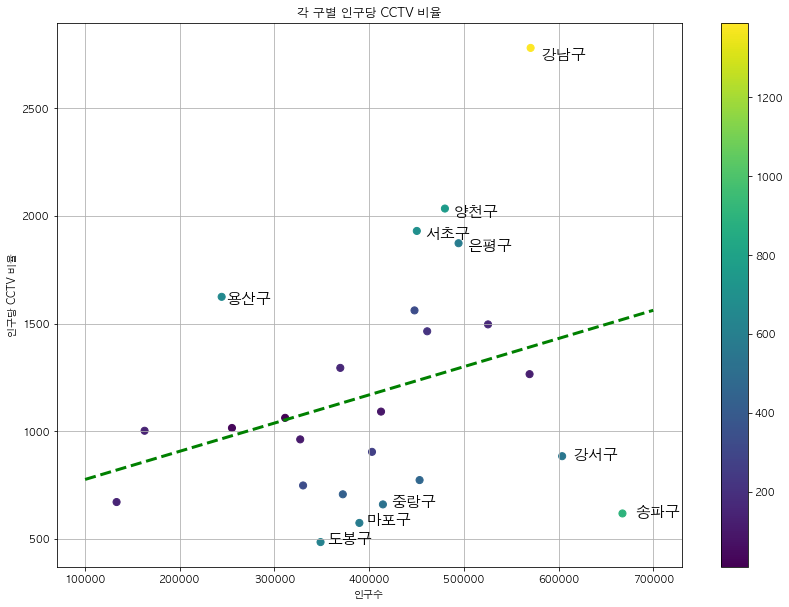

In [38]:
# text 와 color map 입히기 

plt.figure(figsize = (14,10))
plt.scatter(data_result['인구수'], data_result['cctv수'],
           c = data_result['오차'], s = 50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')

# 오차 상위 10개의 자치구만 선택해서 점 옆에 text 쓰겠다. 
for n in range (10):
    plt.text(x = df_sort['인구수'][n]*1.02, y = df_sort['cctv수'][n]*0.98, # 뒤에 숫자 없어도 되지만, 보기 좀 편하라고 띄운것 뿐.
            s = df_sort.index[n], fontsize = 15)
    
# matplotlib.pyplot.text(x, y, s, fontdict=None, withdash=<deprecated parameter>, **kwargs)
# x, y: The position to place the text.
# Add the text s to the axes at location x, y in data coordinates.

    
plt.xlabel('인구수')
plt.ylabel('인구당 CCTV 비율')
plt.title("각 구별 인구당 CCTV 비율")

plt.colorbar()
plt.grid()
plt.show()


